In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Data**

In [2]:
train = np.load("data/train_matrix.npy")
train_label = np.load("data/train_labels.npy")

In [3]:
test = np.load("data/test_matrix.npy")
test_labels = np.load("data/test_labels.npy")

### **Split training data into training and validtion set**

In [4]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(train, train_label, test_size=0.10, random_state=123) 
del train, train_label

### **Build sequential model**

In [6]:
from tensorflow import keras

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = xtrain[0].shape))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 53)                0         
                                                                 
 dense_4 (Dense)             (None, 100)               5400      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 25,701
Trainable params: 25,701
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=[keras.metrics.RootMeanSquaredError()])

### **Train model**

In [11]:
history = model.fit(xtrain, ytrain, 
          batch_size=10000, 
          epochs=50, 
          validation_data=(xvalid, yvalid))

2022-08-21 14:46:28.346485: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 513062260 exceeds 10% of free system memory.


Epoch 1/50
243/243 [==============================] - 6s 18ms/step - loss: 29.5434 - root_mean_squared_error: 5.4354 - val_loss: 10.8538 - val_root_mean_squared_error: 3.2945
Epoch 2/50
243/243 [==============================] - 4s 17ms/step - loss: 9.7133 - root_mean_squared_error: 3.1166 - val_loss: 10.2948 - val_root_mean_squared_error: 3.2085
Epoch 3/50
243/243 [==============================] - 4s 17ms/step - loss: 8.8288 - root_mean_squared_error: 2.9713 - val_loss: 15.6914 - val_root_mean_squared_error: 3.9612
Epoch 4/50
243/243 [==============================] - 4s 17ms/step - loss: 8.5217 - root_mean_squared_error: 2.9192 - val_loss: 16.3832 - val_root_mean_squared_error: 4.0476
Epoch 5/50
243/243 [==============================] - 4s 17ms/step - loss: 8.3444 - root_mean_squared_error: 2.8887 - val_loss: 8.2712 - val_root_mean_squared_error: 2.8760
Epoch 6/50
243/243 [==============================] - 4s 18ms/step - loss: 7.9519 - root_mean_squared_error: 2.8199 - val_loss: 15

### **Loss**

In [12]:
loss = pd.DataFrame(history.history)
loss.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
45,6.192039,2.488381,7.066867,2.658358
46,6.164404,2.482822,6.637872,2.576407
47,6.121908,2.474249,9.373335,3.061590
48,6.184372,2.486840,7.677322,2.770798
49,6.190651,2.488102,6.594337,2.567944


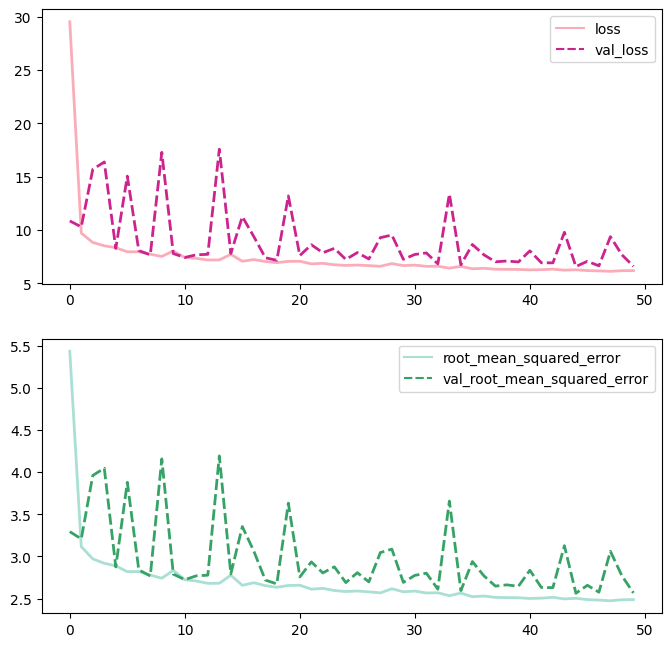

In [16]:
fig, axes = plt.subplots(nrows=2,figsize=(8,8), dpi=100)
sns.lineplot(data=loss.loc[:,["loss","val_loss"]], palette="RdPu",linewidth=2.0, ax=axes[0]);
sns.lineplot(data=loss.loc[:,["root_mean_squared_error","val_root_mean_squared_error"]], palette="BuGn",linewidth=2.0, ax=axes[1]);

### **Prediction**

In [14]:
model.evaluate(test, test_labels)

  105/28100 [..............................] - ETA: 27s - loss: 46.6171 - root_mean_squared_error: 6.8277   

2022-08-21 14:50:56.435055: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 190627008 exceeds 10% of free system memory.


28100/28100 [==============================] - 23s 825us/step - loss: 32.3987 - root_mean_squared_error: 5.6920


[32.398651123046875, 5.691981315612793]